In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 24})

In [3]:
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

constants

In [4]:
v = 247. # GeV

fermions = {'e'   :0.000511,
            'mu'  :0.105,
            'tau' :1.777,
            'u'   :0.002,
            'd'   :0.005,
            's'   :0.095,
            'c'   :1.275,
            'b'   :4.180,
            't'   :173.210}

functions definitions

In [5]:
def theta(mf, mh):
    
    th = np.ones(len(mh))
    th[(mh<2*mf)] *= 0
    return th
    
def width(mf, mh):
    
    coeff = 1./8./np.pi/v**2
    th = theta(mf, mh)
    
    main_body = mf**2 * mh * (1. - 4.*(mf/mh)**2)**(3./2.)
    main_body[np.isnan(main_body)] = np.zeros(len(main_body[np.isnan(main_body)]))
    
    return coeff * main_body * th
    
def width_all(mh):
    Gammas_all = np.array([width(fermions[fi], mh)for fi in fermions.keys()])
    return np.sum(Gammas_all, axis=0)

plotting function

In [20]:
def plot_br(mh_min=0.001, mh_max=5., fermion_keys=fermions.keys()):
    
    higgs_mass = np.linspace(mh_min,mh_max,300)
    Gamma_tot = width_all(higgs_mass)
    
    plt.figure(figsize=(12,6))
    plt.xlabel(r'$m_H$, GeV')
    plt.ylabel(r'$B_i$')
    plt.ylim(0.,1.25)
    plt.xlim(mh_min, mh_max)
    
    plt.axhline(1., c='k', lw=2, linestyle='--')

    for k in fermion_keys:
        plt.plot(higgs_mass, width(fermions[k], higgs_mass)/Gamma_tot, 
                 lw=3, label=k)
    
    plt.legend(fontsize=15, ncol=5)
    plt.grid(alpha=0.2)
    plt.show()
    
    return 0

# 1. Higgs mass from 0 to 5 GeV

/home/maria/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':
/home/maria/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


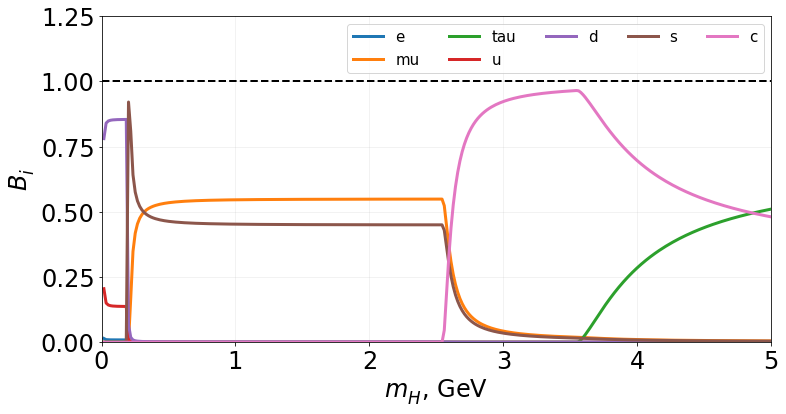

0

In [21]:
plot_br(mh_min=0.001, mh_max=5., fermion_keys= ['e','mu', 'tau','u','d','s','c'])

# 2. Higgs mass from 0 to 500 GeV

/home/maria/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':
/home/maria/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


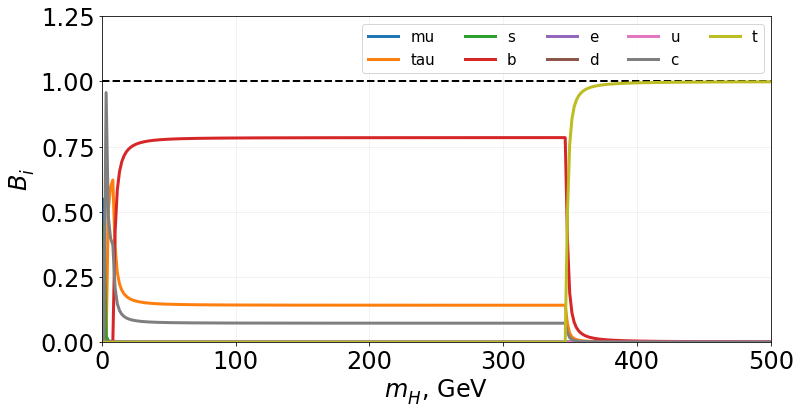

0

In [22]:
plot_br(mh_min=0.001, mh_max=500., fermion_keys=fermions.keys())